In [1]:
pip install opendatasets

In [2]:
 import tensorflow as tf
 import numpy as np
 from tensorflow import keras
 from tensorflow.keras import layers
 import matplotlib.pyplot as plt
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.models import load_model
 from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from tensorflow.keras.preprocessing import image
 import pandas as pd
 import opendatasets as od
 import kagglehub
 from kagglehub import KaggleDatasetAdapter

In [3]:
od.download("https://www.kaggle.com/datasets/obulisainaren/forest-fire-c4")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joeljebaraj
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/obulisainaren/forest-fire-c4


100%|██████████| 123M/123M [00:00<00:00, 736MB/s] 

In [7]:
data_dir ="/content/forest-fire-c4/Forect Fire/Forest Fire_Dataset/test"

In [8]:
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [9]:
train_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="categorical",subset="training")

Found 640 images belonging to 4 classes.


In [10]:
val_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="categorical", subset="validation")


Found 160 images belonging to 4 classes.


In [11]:
model = keras.Sequential([layers.Conv2D(16,3,padding="same",activation="relu",input_shape=(150,150,3)),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(32,3,padding="same",activation="relu"),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(128,activation="relu"),
                          layers.Dense(4,activation="softmax")])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,607,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,613,156 (21.41 MB)

 Trainable params: 5,613,156 (21.41 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
class_indices = train_gen.class_indices
class_name = list(class_indices.keys())
print(class_indices)
print(class_name)

{'fire': 0, 'nofire': 1, 'smoke': 2, 'smokefire': 3}
['fire', 'nofire', 'smoke', 'smokefire']


In [14]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [17]:
model.fit(train_gen,epochs=10,validation_data=val_gen,batch_size=32)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 931ms/step - accuracy: 0.4122 - loss: 1.4768 - val_accuracy: 0.5625 - val_loss: 1.0388
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 832ms/step - accuracy: 0.6505 - loss: 0.9009 - val_accuracy: 0.6375 - val_loss: 0.9061
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 834ms/step - accuracy: 0.6996 - loss: 0.6702 - val_accuracy: 0.6625 - val_loss: 0.9121
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 871ms/step - accuracy: 0.7596 - loss: 0.5494 - val_accuracy: 0.7000 - val_loss: 0.7094
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 848ms/step - accuracy: 0.8736 - loss: 0.3794 - val_accuracy: 0.7375 - val_loss: 0.6820
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 824ms/step - accuracy: 0.9198 - loss: 0.2669 - val_accuracy: 0.7937 - val_loss: 0.6973
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 882ms/step - accuracy: 0.9592 - loss: 0.2117 - val_accuracy: 0.7937 - val_loss: 0.6048
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 798ms/step - accuracy: 0.9787 - loss: 0.1545 - val_accu

In [18]:
model.save('/content/forest-fire-c4/forest.h5')

In [19]:
model = load_model('/content/forest-fire-c4/forest.h5')
print("Model Loaded")

Model Loaded


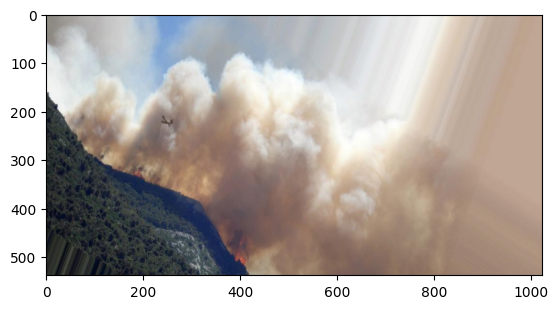

In [20]:
test_image = image.load_img("/content/forest-fire-c4/Forect Fire/Forest Fire_Dataset/test/smokefire/smokefire_test_1007.jpg")
plt.imshow(test_image)
plt.axis()
plt.show()

In [21]:
img_array = image.img_to_array(test_image.resize((150, 150)))
img_array = np.expand_dims(img_array,axis=0)
img_array/=255


In [22]:
 prediction = model.predict(img_array)
 ind=np.argmax(prediction)
 prediction=prediction[0][ind]
 print(prediction)
 print(class_name[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
0.713313
smokefire
